In [2]:
import numpy as np

In [165]:
# Set seed for reproducibility
np.random.seed(42)

We show the result of a Lotka-Volterra Model for population dynamics. 

In [172]:
# We will simulate population dynamics for 10 species
n_species = 6
n_time = 1000

In [176]:
# Create an interaction matrix with A_ij being a number between -1 and 1 indicating the effect of species j on species i
def generate_interaction_matrix(n_species):
    a_range = 0.05
    A = np.random.uniform(-a_range, a_range, (n_species, n_species))
    A[np.random.rand(n_species, n_species) > 0.50] = 0
    np.fill_diagonal(A, 0)
    return A

# Generate Carry capacity for each species
def generate_carrying_capacity(n_species):
    K = np.random.uniform(200, 1000, n_species)
    return K

# Generate initial population sizes
def generate_initial_population(n_species):
    N = np.random.uniform(0, 200, n_species)
    return N

def generate_general_growth_rate(n_species):
    r = np.random.uniform(-0.05, 0.05, n_species)
    return r

# next population size using lotka volterra
def next_population_size(N, A, K, r, dt=1):
    effective_r =  np.dot(A, N / K)
    next_N  = N +  N * (1 - N / K) * effective_r * dt
    # Make sure population size is positive
    next_N[next_N < 0] = 0
    return next_N

# Generate population dynamics
def generate_population_dynamics(n_species, n_time, dt=1):
    A = generate_interaction_matrix(n_species)
    K = generate_carrying_capacity(n_species)
    N = generate_initial_population(n_species)
    r = generate_general_growth_rate(n_species)

    # Print all parameters
    print("Interaction matrix:")
    print(A)
    print("Carrying capacity:")
    print(K)
    print("Initial population size:")
    print(N)
    print("General growth rate:")
    print(r)
    
    
    
    n_steps = int(n_time//dt)
    population_dynamics = np.zeros((n_steps, n_species))
    population_dynamics[0, :] = N
    for t in range(1, n_steps):
        N = next_population_size(N, A, K, r, dt)
        population_dynamics[t, :] = N
    return population_dynamics

    


In [177]:
dynamics = generate_population_dynamics(n_species, n_time, dt=0.1)
    

Interaction matrix:
[[ 0.          0.          0.         -0.01322842  0.          0.        ]
 [ 0.04730106  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.04666548  0.          0.03530095]
 [ 0.          0.          0.          0.         -0.03305073  0.        ]]
Carrying capacity:
[858.08044853 488.15251313 301.64841012 617.79460804 815.99484248
 372.656822  ]
Initial population size:
[124.57809516  17.069493    10.33634423 106.27092631 108.12702432
 127.4859803 ]
General growth rate:
[ 0.02260913  0.04758521  0.00163003 -0.01770435  0.02951862 -0.02291677]


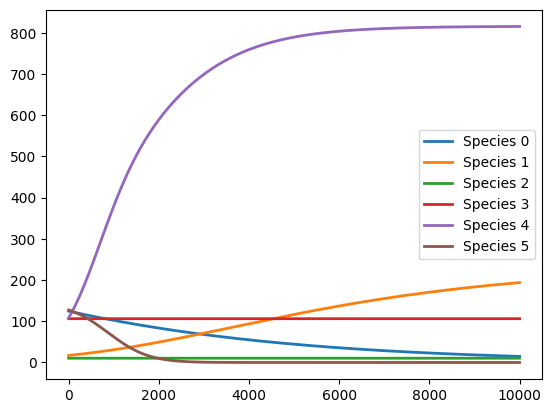

In [178]:
# Plot population dynamics

import matplotlib.pyplot as plt

plt.plot(dynamics, linewidth=2)

# Add legend
plt.legend(["Species {}".format(i) for i in range(n_species)])

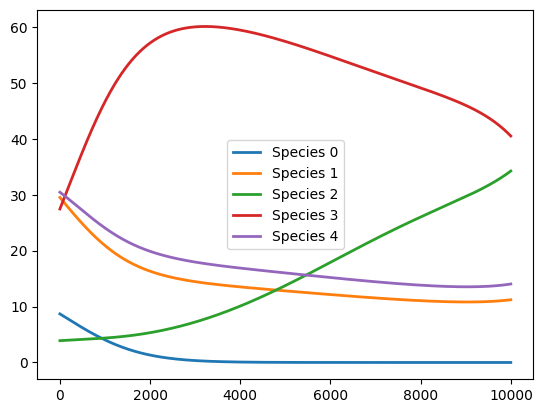

In [157]:
dynamics_percent = dynamics / np.sum(dynamics, axis=1, keepdims=True) * 100

# Plot population dynamics
plt.plot(dynamics_percent, linewidth=2)
plt.legend(["Species {}".format(i) for i in range(n_species)])

In [164]:
# Regress species 1 on the rest of the species
from sklearn.linear_model import LinearRegression

X = dynamics_percent[:, np.array([1,2])]
y = dynamics_percent[:, 3]

# Center X and y
X = X - np.mean(X, axis=0, keepdims=True)
y = y - np.mean(y, axis=0, keepdims=True)
X = X / np.std(X, axis=0, keepdims=True)
y = y / np.std(y, axis=0, keepdims=True)

# Fit with intercept
print(X.shape)
print(y.shape)

# Fit without intercept
reg = LinearRegression(fit_intercept=False).fit(X, y)
print("R^2: {}".format(reg.score(X, y)))
print("Coefficients: {}".format(reg.coef_))





(9999, 2)
(9999,)
R^2: 0.9994168797514962
Coefficients: [-1.43822197 -1.33800517]
